## Use Logistic Model for Default Prediction

In [356]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

In [149]:
df = pd.read_csv("/Users/61310joy/Default_Predict/Data/encoded_features.csv")
df.head()

/var/folders/qw/h2s12w2524z6vtfqym33s89m0000gn/T/ipykernel_70335/2997916986.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/61310joy/Default_Predict/Data/encoded_features.csv")


,Loan Sequence Number,Credit Score,Original Loan-to-Value (LTV),Original Combined Loan-to-Value (CLTV),Original Debt-to-Income (DTI) Ratio,Original Interest Rate,Original UPB,Current Actual UPB,Loan Age,Remaining Months to Legal Maturity,...,Property State_TN,Property State_TX,Property State_UT,Property State_VA,Property State_VI,Property State_VT,Property State_WA,Property State_WI,Property State_WV,Property State_WY
0,F20Q10000001,661,36,36,19,2.875,66000,40665.26,58,122,...,False,False,False,False,False,False,False,False,False,False
1,F20Q10000002,681,95,95,13,5.750,52000,46807.70,61,299,...,False,False,False,False,False,False,False,False,False,False
2,F20Q10000003,775,87,87,29,3.250,248000,0.00,24,336,...,False,False,False,False,False,False,False,False,False,False
3,F20Q10000004,770,65,65,14,3.625,125000,89979.70,61,119,...,False,False,False,False,False,False,False,False,False,False
4,F20Q10000005,791,80,80,33,3.875,58000,47698.13,60,300,...,False,False,False,False,False,False,False,False,False,False


In [150]:
df.columns

Index(['Loan Sequence Number', 'Credit Score', 'Original Loan-to-Value (LTV)',
       'Original Combined Loan-to-Value (CLTV)',
       'Original Debt-to-Income (DTI) Ratio', 'Original Interest Rate',
       'Original UPB', 'Current Actual UPB', 'Loan Age',
       'Remaining Months to Legal Maturity', 'Estimated Loan-to-Value (ELTV)',
       'Current Loan Delinquency Status', 'Number of Borrowers',
       'Property State', 'Current Deferred UPB', 'Current Interest Rate',
       'Occupancy Status', 'Original Loan Term', 'First Payment Date',
       'Default', 'Default.1', 'Occupancy Status_I', 'Occupancy Status_S',
       'Default.2', 'Property State_AL', 'Property State_AR',
       'Property State_AZ', 'Property State_CA', 'Property State_CO',
       'Property State_CT', 'Property State_DC', 'Property State_DE',
       'Property State_FL', 'Property State_GA', 'Property State_GU',
       'Property State_HI', 'Property State_IA', 'Property State_ID',
       'Property State_IL', 'Property

### Scailing 

In [151]:
## Scaling 
scale_cols = [
    'Credit Score', 
    'Original Loan-to-Value (LTV)', 
    'Original Combined Loan-to-Value (CLTV)',
    'Original Debt-to-Income (DTI) Ratio', 
    'Original Interest Rate', 
    'Current Interest Rate', 
    'Original UPB', 
    'Current Actual UPB',
    'Loan Age', 
    'Remaining Months to Legal Maturity', 
    'Estimated Loan-to-Value (ELTV)', 
    'Original Loan Term'
]

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[scale_cols] = scaler.fit_transform(df_scaled[scale_cols])
df_scaled[scale_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Credit Score,11569815.0,6.842151e-16,1.0,-10.200454,-0.671854,0.206670,0.814878,2.188979
Original Loan-to-Value (LTV),11569815.0,-3.773245e-16,1.0,-3.895505,-0.618986,0.214028,0.547233,9.210572
Original Combined Loan-to-Value (CLTV),11569815.0,6.540291e-17,1.0,-3.898482,-0.628817,0.202453,0.590380,51.408723
Original Debt-to-Income (DTI) Ratio,11569815.0,-7.043391e-17,1.0,-2.692536,-0.542291,0.094819,0.652289,76.786881
Original Interest Rate,11569815.0,2.012397e-16,1.0,-1.548808,-0.657170,-0.413996,0.396585,3.801022
Current Interest Rate,11569815.0,-3.219836e-16,1.0,-1.548739,-0.657083,-0.413904,0.396692,3.801196
Original UPB,11569815.0,5.534093e-17,1.0,-1.859910,-0.755268,-0.186797,0.569010,12.371237
Current Actual UPB,11569815.0,2.012397e-17,1.0,-1.265035,-0.733441,-0.102447,0.592579,11.600243
Loan Age,11569815.0,8.049589e-17,1.0,-2.079137,-0.889711,0.299715,0.834957,1.608084
Remaining Months to Legal Maturity,11569815.0,3.219836e-16,1.0,-3.621094,0.173702,0.338098,0.612090,2.639635


### Feature Selection

### Calculate VIF to determine what features should be included in the model

#### Check VIF(Multicollinearity)

In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [153]:
X = df_scaled[[
    'Credit Score', 'Original Loan-to-Value (LTV)',
    'Original Combined Loan-to-Value (CLTV)',
    'Original Debt-to-Income (DTI) Ratio',
    'Original Interest Rate', 'Original UPB','Current Actual UPB',
    'Loan Age', 'Remaining Months to Legal Maturity',
    'Estimated Loan-to-Value (ELTV)', 'Number of Borrowers',
    'Current Interest Rate', 'Original Loan Term', 'Current Deferred UPB'
]]

#Count VIF 
vif_data = pd.DataFrame()
vif_data["Features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                                  Features           VIF
0                             Credit Score      1.054651
1             Original Loan-to-Value (LTV)     70.880287
2   Original Combined Loan-to-Value (CLTV)     70.937752
3      Original Debt-to-Income (DTI) Ratio      1.053382
4                   Original Interest Rate  14313.212985
5                             Original UPB      3.250396
6                       Current Actual UPB      4.526871
7                                 Loan Age      8.825785
8       Remaining Months to Legal Maturity     94.729700
9           Estimated Loan-to-Value (ELTV)      2.244216
10                     Number of Borrowers      1.007141
11                   Current Interest Rate  14317.811700
12                      Original Loan Term     84.266223
13                    Current Deferred UPB      1.031076


From VIF, drop `Original Loan-to-Value (LTV)`, `Original Combined Loan-to-Value (CLTV)`, `Original Interest Rate`, `Remaining Months to Legal Maturity`, `Original Loan Term`

In [154]:
df_selected = df_scaled.copy()

drop_list = [
    'Loan Sequence Number',
    'Original Loan-to-Value (LTV)',
    'Original Combined Loan-to-Value (CLTV)',
    'Original Interest Rate',
    'Remaining Months to Legal Maturity',
    'Original Loan Term'
]

df_final = df_selected.drop(columns=drop_list, errors='ignore')
df_final.head()

,Credit Score,Original Debt-to-Income (DTI) Ratio,Original UPB,Current Actual UPB,Loan Age,Estimated Loan-to-Value (ELTV),Current Loan Delinquency Status,Number of Borrowers,Property State,Current Deferred UPB,...,Property State_TN,Property State_TX,Property State_UT,Property State_VA,Property State_VI,Property State_VT,Property State_WA,Property State_WI,Property State_WV,Property State_WY
0,-2.068481,-1.259039,-1.491696,-1.026206,1.370199,-0.615709,0,2,MD,0.0,...,False,False,False,False,False,False,False,False,False,False
1,-1.617956,-1.736871,-1.582135,-0.990131,1.548612,-0.563987,0,1,KS,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0.499511,-0.462652,-0.315995,-1.265035,-0.651826,1.931567,0,2,CO,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0.386880,-1.657233,-1.110562,-0.736581,1.548612,1.931567,0,1,MO,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0.859931,-0.144097,-1.543375,-0.984902,1.489141,-0.600192,0,1,NY,0.0,...,False,False,False,False,False,False,False,False,False,False


In [156]:
y = df_final['Default'].astype(int)
X = df_final.drop(columns=['Default','Default.1', 'Default.2', 'Occupancy Status', 
                              'Property State', 'First Payment Date', 'Current Loan Delinquency Status'], errors='ignore')
print(X.columns)

Index(['Credit Score', 'Original Debt-to-Income (DTI) Ratio', 'Original UPB',
       'Current Actual UPB', 'Loan Age', 'Estimated Loan-to-Value (ELTV)',
       'Number of Borrowers', 'Current Deferred UPB', 'Current Interest Rate',
       'Occupancy Status_I', 'Occupancy Status_S', 'Property State_AL',
       'Property State_AR', 'Property State_AZ', 'Property State_CA',
       'Property State_CO', 'Property State_CT', 'Property State_DC',
       'Property State_DE', 'Property State_FL', 'Property State_GA',
       'Property State_GU', 'Property State_HI', 'Property State_IA',
       'Property State_ID', 'Property State_IL', 'Property State_IN',
       'Property State_KS', 'Property State_KY', 'Property State_LA',
       'Property State_MA', 'Property State_MD', 'Property State_ME',
       'Property State_MI', 'Property State_MN', 'Property State_MO',
       'Property State_MS', 'Property State_MT', 'Property State_NC',
       'Property State_ND', 'Property State_NE', 'Property State_N

In [157]:
df_final['Default'].value_counts()

Default
0    11524257
1       45558
Name: count, dtype: int64

The data is very inbalanced

In [158]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

train_df = X_train.copy()
train_df['Default'] = y_train
test_df = X_test.copy()
test_df['Default'] = y_test

train_scaled = train_df.copy()
test_scaled  = test_df.copy()

In [159]:
FEATURES = [col for col in train_df.columns if col != 'Default']
print(f"features columns：{len(FEATURES)}")

features columns：64


In [303]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.array([0, 1], dtype=np.int8)

weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = {0: weights[0], 1: weights[1]}
print("Class Weights:", class_weights_dict)

Class Weights: {0: np.float64(0.5019765843479371), 1: np.float64(63.490407691407164)}


In [328]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(
    loss="log_loss",
    penalty="l2", 
    class_weight=class_weights_dict,  
    learning_rate="optimal",
    max_iter=1,
    random_state=42
)

In [329]:
classes = np.array([0, 1], dtype=np.int8)
CHUNK_SIZE = 100_000
EPOCHS = 5

In [330]:
n_rows = len(train_scaled)
for ep in range(EPOCHS):
    idx = np.random.RandomState(42 + ep).permutation(n_rows)
    for start in range(0, n_rows, CHUNK_SIZE):
        end = min(start + CHUNK_SIZE, n_rows)
        batch_idx = idx[start:end]
        batch = train_scaled.iloc[batch_idx]

        Xb = batch[FEATURES].to_numpy(dtype=np.float32, copy=False)
        yb = batch['Default'].to_numpy(dtype=np.int8, copy=False)

        clf.partial_fit(Xb, yb, classes=classes)

In [331]:
from sklearn.metrics import (
    roc_curve, roc_auc_score, average_precision_score,
    confusion_matrix, classification_report
)
def evaluate_model(name, y_true, y_proba, threshold=None, digits=4, verbose=True):
    """
    y_true  : 1D array (0/1 labels)
    y_proba : 1D array (P(y=1)) from predict_proba[:,1]
    threshold : if None, choose by Youden's J (argmax(tpr - fpr))
    """
    y_true = np.asarray(y_true).astype(int)
    y_proba = np.asarray(y_proba, dtype=float)

    # ROC & best threshold (Youden's J)
    fpr, tpr, thr = roc_curve(y_true, y_proba)
    ks = float(np.max(tpr - fpr))
    if threshold is None:
        best_idx = np.argmax(tpr - fpr)
        if best_idx == 0:
            threshold = float(thr[0])
        else:
            threshold = float(thr[best_idx-1])

    # Predictions
    y_pred = (y_proba >= threshold).astype(int)

    # Metrics
    auc = float(roc_auc_score(y_true, y_proba))
    pr_auc = float(average_precision_score(y_true, y_proba))
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()
    acc = (tp + tn) / (tp + tn + fp + fn + 1e-12)
    prec = tp / (tp + fp + 1e-12)
    rec = tp / (tp + fn + 1e-12)
    spec = tn / (tn + fp + 1e-12)
    f1 = 2 * prec * rec / (prec + rec + 1e-12)

    if verbose:
        print(f" === {name} === ")
        print(f"AUC      : {auc:.{digits}f}")
        print(f"KS       : {ks:.{digits}f}")
        print(f"PR-AUC   : {pr_auc:.{digits}f}")
        print(f"Thr      : {threshold:.{digits}f}")
        print("Confusion Matrix [tn fp; fn tp]:")
        print(np.array([[tn, fp], [fn, tp]]))
        print("\nClassification Report:\n",
              classification_report(y_true, y_pred, digits=digits))

In [332]:
from sklearn.calibration import CalibratedClassifierCV

In [333]:
X_valid = train_scaled[FEATURES].iloc[valid_idx].to_numpy(np.float32)
y_valid = train_scaled['Default'].iloc[valid_idx].to_numpy(np.int8)

In [340]:
cal = CalibratedClassifierCV(estimator=clf, method='isotonic', cv='prefit')
cal.fit(X_valid, y_valid)

/opt/anaconda3/envs/Mortgage_Default_Predict/lib/python3.13/site-packages/sklearn/calibration.py:330: FutureWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


,estimator,SGDClassifier...ndom_state=42)
,method,'isotonic'
,cv,'prefit'
,n_jobs,None
,ensemble,'auto'
,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1


In [354]:
proba_cal = cal.predict_proba(X_test_np)[:, 1]
evaluate_model("Calibrated SGD", y_test_np, proba_cal, threshold=0.045)

 === Calibrated SGD === 
AUC      : 0.8553
KS       : 0.5490
PR-AUC   : 0.0393
Thr      : 0.0450
Confusion Matrix [tn fp; fn tp]:
[[2863990   17074]
 [   9466    1924]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9967    0.9941    0.9954   2881064
           1     0.1013    0.1689    0.1266     11390

    accuracy                         0.9908   2892454
   macro avg     0.5490    0.5815    0.5610   2892454
weighted avg     0.9932    0.9908    0.9920   2892454



PR-AUC (Average Precision): 0.039280


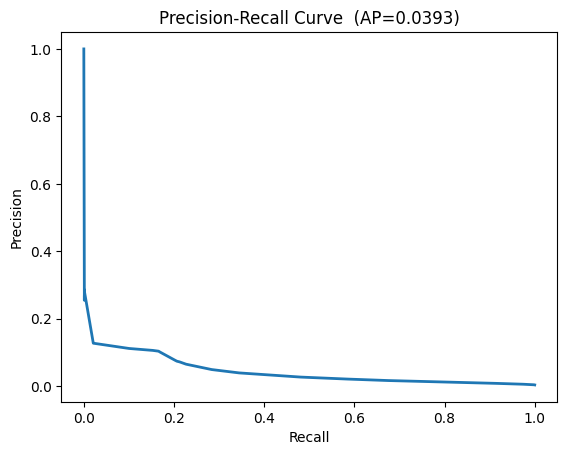

In [362]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_true = y_test_np.astype(int)
y_score = proba_cal.astype(float)

precision, recall, thresholds = precision_recall_curve(y_true, y_score)
ap = average_precision_score(y_true, y_score)
print(f"PR-AUC (Average Precision): {ap:.6f}")

plt.figure()
plt.plot(recall, precision, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve  (AP={ap:.4f})")
plt.grid(False)
plt.show()

ROC-AUC: 0.855267


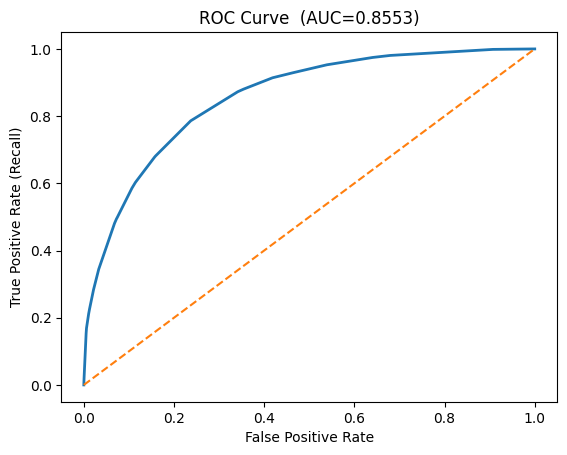

In [361]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, roc_thr = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)
print(f"ROC-AUC: {roc_auc:.6f}")

plt.figure()
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--")  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title(f"ROC Curve  (AUC={roc_auc:.4f})")
plt.grid(False)
plt.show()

### Conclusion